In [1]:
from net import VGG

In [2]:
import numpy as np
from scipy.special import comb

In [3]:
def simplex_grid(m, n):
    L = comb(n+m-1, m-1, exact=True)
    out = np.empty((L, m), dtype=int)

    x = np.zeros(m, dtype=int)
    x[m-1] = n

    for j in range(m):
        out[0, j] = x[j]

    h = m

    for i in range(1, L):
        h -= 1

        val = x[h]
        x[h] = 0
        x[m-1] = val - 1
        x[h-1] += 1

        for j in range(m):
            out[i, j] = x[j]

        if val != 1:
            h = m

    return out

In [3]:
import torch

In [19]:
model = VGG('VGG16')

In [11]:
st_dict = torch.load('model_weights/vgg_weights_0.pth',map_location='cpu')

In [14]:
list(st_dict.keys())[-2:]

['classifier.weight', 'classifier.bias']

In [25]:
for val in st_dict.values():
    print(val.sum())

tensor(4.1148)
tensor(0.3940)
tensor(-15.1442)
tensor(-0.1699)
tensor(-37.9468)
tensor(1.5272)
tensor(2.6172)
tensor(0.0162)


In [26]:
for key in st_dict.keys(): st_dict[key] /= 4

In [27]:
for val in st_dict.values():
    print(val.sum())

tensor(1.0287)
tensor(0.0985)
tensor(-3.7860)
tensor(-0.0425)
tensor(-9.4867)
tensor(0.3818)
tensor(0.6543)
tensor(0.0041)


In [28]:
st_dict.copy()

OrderedDict([('conv1.weight',
              tensor([[[[ 0.0400,  0.0727,  0.0329,  0.0883,  0.0079],
                        [-0.0083,  0.0194,  0.1025,  0.0679, -0.0494],
                        [ 0.0386,  0.0620,  0.1111,  0.0248,  0.0182],
                        [-0.0028,  0.0730,  0.0586,  0.0163,  0.0257],
                        [-0.0359, -0.0037,  0.0205,  0.0778, -0.0279]]],
              
              
                      [[[-0.0271, -0.0338, -0.0660, -0.0389, -0.0882],
                        [ 0.0410, -0.0568,  0.0075, -0.0423, -0.0639],
                        [ 0.0515,  0.0461,  0.0816,  0.0242, -0.0139],
                        [ 0.0286,  0.0368,  0.0983,  0.1024,  0.0632],
                        [-0.0524,  0.0356,  0.0383,  0.0700,  0.0236]]],
              
              
                      [[[-0.0398,  0.0247,  0.0197,  0.0680,  0.0259],
                        [ 0.0241,  0.0683,  0.0501,  0.0441, -0.0595],
                        [ 0.0584,  0.0718,  0.0709, -0

In [5]:
from mpl_toolkits import mplot3d

import numpy as np
import matplotlib.pyplot as plt
plt.switch_backend('agg')

def f(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

x = np.linspace(-6, 6, 30)
y = np.linspace(-6, 6, 30)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='viridis', edgecolor='none')
ax.set_title('surface');

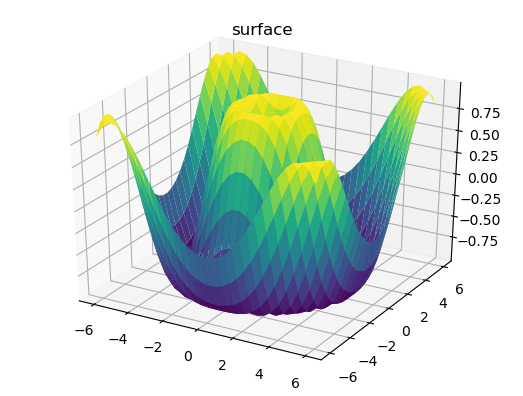

In [6]:
fig

In [333]:
import matplotlib
matplotlib.rcParams.update({'font.serif': 'Times New Roman',
                                'font.size': 10.0,
                                'axes.labelsize': 'Medium',
                                'axes.labelweight': 'normal',
                                'axes.linewidth': 0.8,
                                 ###########################################
                                 # THIS IS THE IMPORTANT ONE FOR STRETCHING
                                 # default is [6,4] but...i changed it to
                                'figure.figsize':[20,15]   # THIS ONE #
                              })

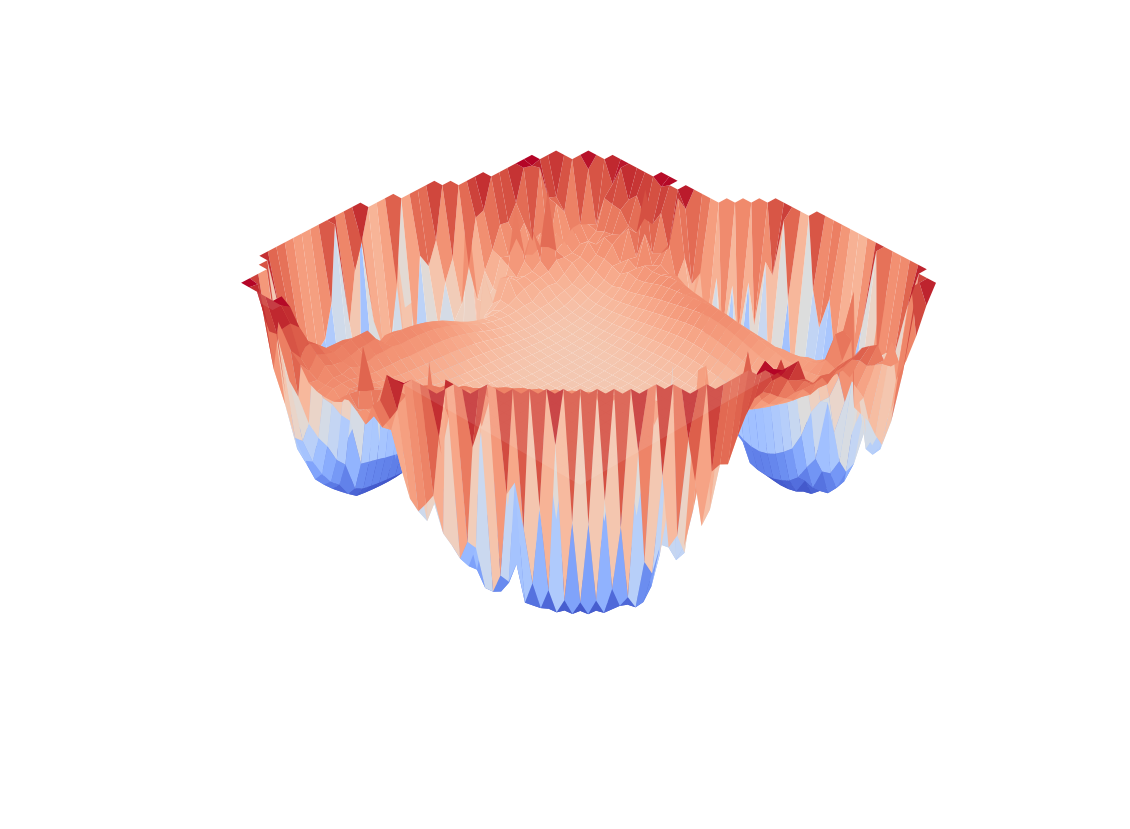

In [335]:
X = np.load('plots/X_cifar.npy')
Y = np.load('plots/Y_cifar.npy')
Z = np.load('plots/Z_cifar.npy')
Z[Z > 3.5] = 3.5

# msk = Z > 3.4
# Z = np.ma.array(Z, mask=msk)
# X = np.ma.array(X, mask=msk)
# Y = np.ma.array(Y, mask=msk)


cmap = matplotlib.cm.coolwarm
cmap.set_bad('white',1.)
cmap.set_over('white',alpha=.1)

fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.set_xlim(-0.5,1,5)
# ax.set_ylim(-0.5,1,5)
ax.set_zlim(0,3.5)
plt.axis('off')
ax.plot_surface(X, Y, Z, vmax=3.4999, rstride=1, cstride=1,
                cmap=cmap, edgecolor='none', antialiased=True)
ax.view_init(50, 225)

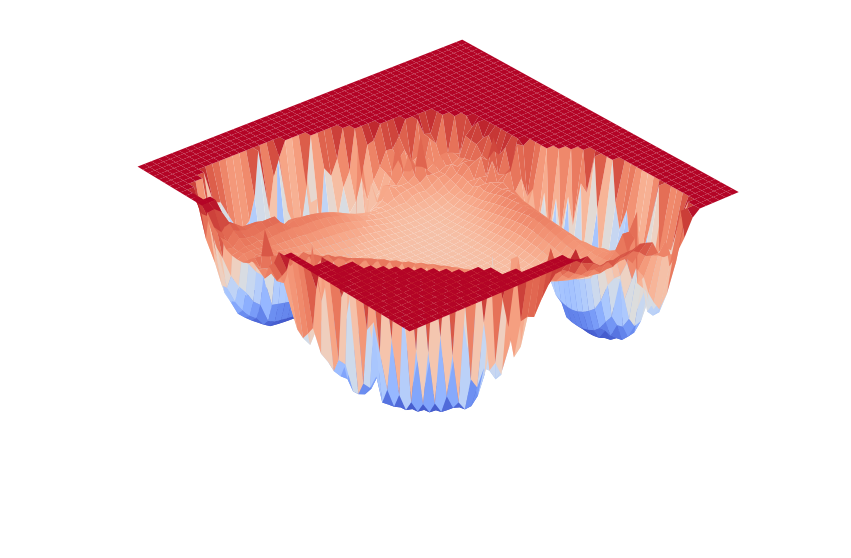

In [262]:
X = np.load('plots/X_cifar.npy')
Y = np.load('plots/Y_cifar.npy')
Z = np.load('plots/Z_cifar.npy')
Z[Z > 3.4] = 3.4

fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.set_xlim(-0.5,1,5)
# ax.set_ylim(-0.5,1,5)
ax.set_zlim(0,3.5)
plt.axis('off')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='coolwarm', edgecolor='none', antialiased=True)
ax.view_init(50, 230)

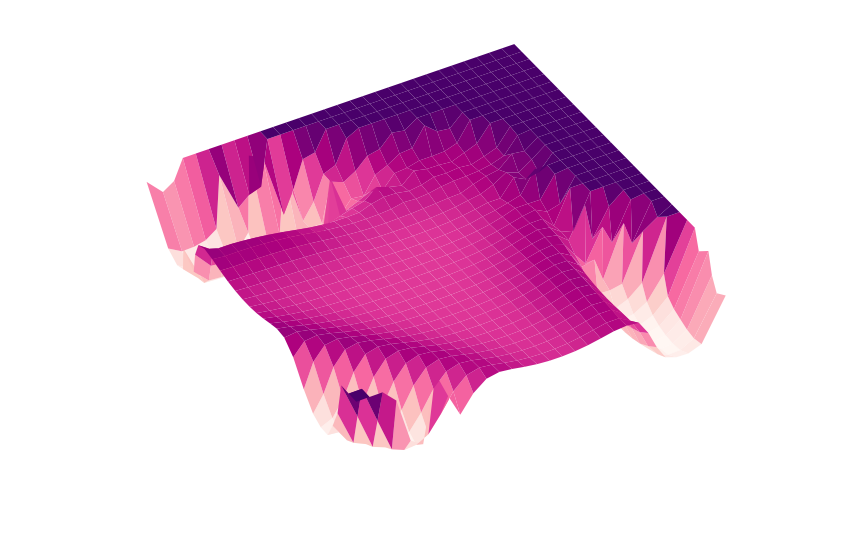

In [178]:
fig = plt.figure()
ax = plt.axes(projection='3d')
# ax.set_xlim(-0.5,1,5)
# ax.set_ylim(-0.5,1,5)
ax.set_zlim(0,3.5)
plt.axis('off')
ax.plot_surface(X, Y, Z, rstride=1, cstride=1,
                cmap='RdPu', edgecolor='none', antialiased=True)
ax.view_init(70, 240)

In [100]:
x = np.load('plots/grid_cifar.npy')[:,0]
y = np.load('plots/grid_cifar.npy')[:,1]
z = np.load('plots/grid_val_cifar.npy')

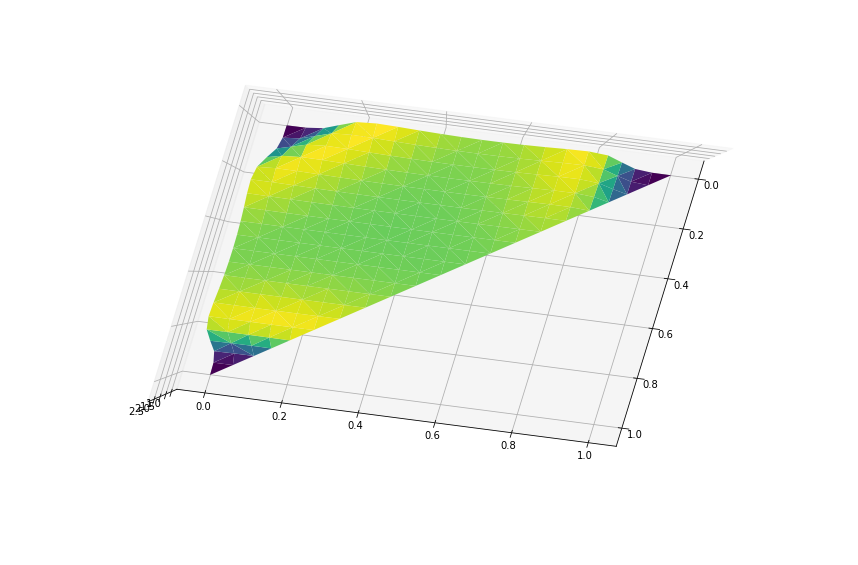

In [101]:
fig = plt.figure()
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(x)
y = np.ravel(y)
z = z
ax = plt.axes(projection='3d')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none');

ax.view_init(90, 10)

In [58]:
x = np.linspace(-2, 2, 30)
y = np.linspace(-2, 2, 30)

X, Y = np.meshgrid(x, y)
Z = 1 - X - Y

In [63]:
l = list()

In [64]:
l += [[]]

In [67]:
l[0] += [1]
l += [[]]
l

[[1, 1], []]

In [62]:
Z.shape, X.shape

((30, 30), (30, 30))

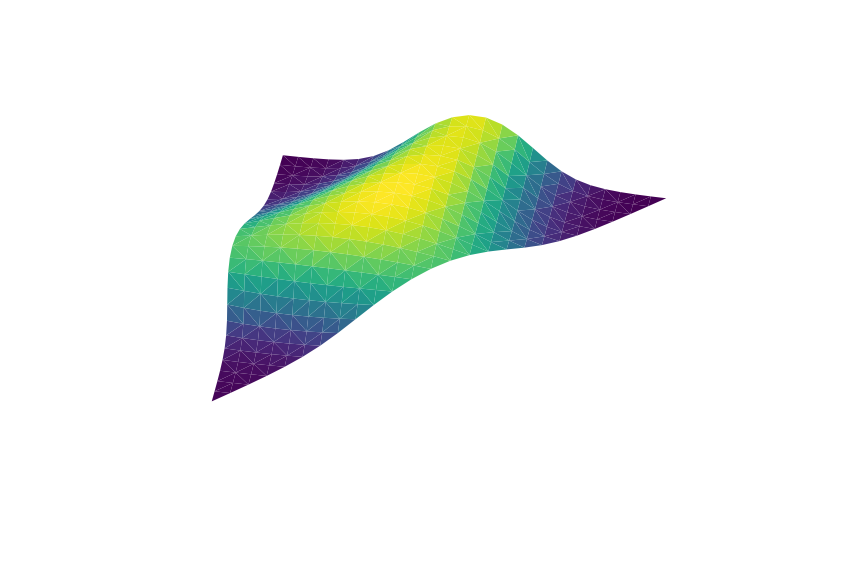

In [44]:
fig = plt.figure()
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(x)
y = np.ravel(y)
z = z
ax = plt.axes(projection='3d')
plt.axis('off')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none');

ax.view_init(80, 10)

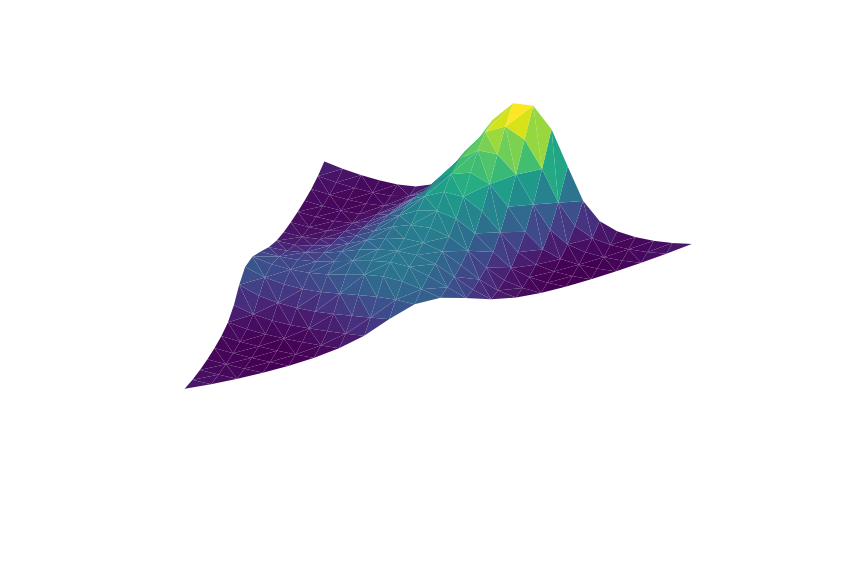

In [11]:
fig = plt.figure()
theta = 2 * np.pi * np.random.random(1000)
r = 6 * np.random.random(1000)
x = np.ravel(x)
y = np.ravel(y)
z = z
ax = plt.axes(projection='3d')
plt.axis('off')
ax.plot_trisurf(x, y, z,
                cmap='viridis', edgecolor='none');
ax.view_init(70, 20)

In [39]:
torch.softmax(torch.Tensor(x), dim=0)

tensor([2.0821e-06, 3.1492e-06, 4.7633e-06, 7.2047e-06, 1.0897e-05, 1.6483e-05,
        2.4931e-05, 3.7709e-05, 5.7037e-05, 8.6271e-05, 1.3049e-04, 1.9737e-04,
        2.9853e-04, 4.5154e-04, 6.8297e-04, 1.0330e-03, 1.5625e-03, 2.3634e-03,
        3.5747e-03, 5.4069e-03, 8.1781e-03, 1.2370e-02, 1.8710e-02, 2.8299e-02,
        4.2804e-02, 6.4743e-02, 9.7927e-02, 1.4812e-01, 2.2404e-01, 3.3886e-01])

In [138]:
from torchvision import datasets, transforms

In [139]:
train_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ])),
        batch_size=64, shuffle=True)

In [146]:
t = datasets.MNIST('../data', train=True, download=True,
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307,), (0.3081,))
                       ]))

In [142]:
t.train_labels = torch.zeros_like(t.train_labels)

In [163]:
t.train_data.shape

torch.Size([60000, 28, 28])

In [154]:
torch.randint(low=0, high=10, size=[60000]).size()

torch.Size([60000])

In [165]:
torch.load_state_dict('./model_weights/lenet_weights_0.pth').keys()

AttributeError: module 'torch' has no attribute 'load_state_dict'

In [19]:
from net import MnistNet
model = MnistNet()

In [24]:
for weight in model.parameters():
    print(weight.norm())

tensor(0., grad_fn=<NormBackward0>)
tensor(0.3502, grad_fn=<NormBackward0>)
tensor(2.5767, grad_fn=<NormBackward0>)
tensor(0.1483, grad_fn=<NormBackward0>)
tensor(4.0910, grad_fn=<NormBackward0>)
tensor(0.2302, grad_fn=<NormBackward0>)
tensor(1.8788, grad_fn=<NormBackward0>)
tensor(0.2971, grad_fn=<NormBackward0>)


In [21]:
for module in model.modules():
    module.weight.data = torch.zeros_like(module.weight.data) 

AttributeError: 'MnistNet' object has no attribute 'weight'

In [191]:
for weight in model.parameters():
    print(weight.norm())

TypeError: 'int' object is not callable

In [23]:
model.conv1.weight.data = torch.zeros_like(model.conv1.weight.data)

In [26]:
model.fc2.weight.data

tensor([[-0.0143, -0.1370,  0.1344,  0.0960, -0.0642, -0.0143, -0.1334, -0.0063,
         -0.0520,  0.1082,  0.0753,  0.0706, -0.0614, -0.0014,  0.0787, -0.0647,
          0.0560,  0.0976,  0.1272,  0.0409, -0.0839,  0.0617,  0.1241, -0.0221,
          0.1237, -0.0523,  0.0153, -0.0769,  0.0991,  0.0791,  0.1245,  0.0243,
         -0.0791, -0.0806,  0.0623,  0.0801,  0.0945,  0.0298,  0.0041, -0.1023,
          0.1368, -0.0769, -0.1187,  0.0171,  0.0157, -0.1395, -0.1168, -0.0435,
         -0.0320,  0.1011],
        [-0.0875,  0.0636, -0.0040,  0.0516, -0.0092, -0.1122,  0.0331, -0.0832,
          0.1076,  0.0562,  0.1046,  0.1343, -0.0157, -0.0575, -0.0115,  0.0421,
          0.0226,  0.0072, -0.0773, -0.0666,  0.0111,  0.0572, -0.1303, -0.1292,
         -0.0604,  0.0955,  0.1192, -0.0019, -0.0024,  0.0259, -0.1225,  0.1140,
         -0.1263,  0.0271, -0.0773,  0.0935, -0.1311,  0.0068,  0.0695,  0.1114,
         -0.1290, -0.1145, -0.0749, -0.1383,  0.0386,  0.1314,  0.0259, -0.0905,


In [30]:
grid = simplex_grid(3, 20) / 20

In [31]:
grid

array([[0.  , 0.  , 1.  ],
       [0.  , 0.05, 0.95],
       [0.  , 0.1 , 0.9 ],
       [0.  , 0.15, 0.85],
       [0.  , 0.2 , 0.8 ],
       [0.  , 0.25, 0.75],
       [0.  , 0.3 , 0.7 ],
       [0.  , 0.35, 0.65],
       [0.  , 0.4 , 0.6 ],
       [0.  , 0.45, 0.55],
       [0.  , 0.5 , 0.5 ],
       [0.  , 0.55, 0.45],
       [0.  , 0.6 , 0.4 ],
       [0.  , 0.65, 0.35],
       [0.  , 0.7 , 0.3 ],
       [0.  , 0.75, 0.25],
       [0.  , 0.8 , 0.2 ],
       [0.  , 0.85, 0.15],
       [0.  , 0.9 , 0.1 ],
       [0.  , 0.95, 0.05],
       [0.  , 1.  , 0.  ],
       [0.05, 0.  , 0.95],
       [0.05, 0.05, 0.9 ],
       [0.05, 0.1 , 0.85],
       [0.05, 0.15, 0.8 ],
       [0.05, 0.2 , 0.75],
       [0.05, 0.25, 0.7 ],
       [0.05, 0.3 , 0.65],
       [0.05, 0.35, 0.6 ],
       [0.05, 0.4 , 0.55],
       [0.05, 0.45, 0.5 ],
       [0.05, 0.5 , 0.45],
       [0.05, 0.55, 0.4 ],
       [0.05, 0.6 , 0.35],
       [0.05, 0.65, 0.3 ],
       [0.05, 0.7 , 0.25],
       [0.05, 0.75, 0.2 ],
 

In [180]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torchvision
import torchvision.transforms as transforms

In [183]:
transform_train = transforms.Compose([
    transforms.RandomCrop(32, padding=4),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2023, 0.1994, 0.2010)),
])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform_train)

Files already downloaded and verified


In [ ]:
trainset.train_labels